# **Artificial Neural Network(ANN) (Yapay Sinir Ağları)**

Deep neural network ya da deep learning de denir.

Her deep learning algoritması ANN değildir, ancak ANN bir deep learning'dir.

# **Neural Network**

Logistic regression'ın alınıp, en az 2 kez tekrar edilmesiyle oluşan bir sistemdir.

Logistic regression'da **input** (pikseller) ve **output** (y_head değeri) layerları vardır.

Neural network'de input ve output layerları arasında bir **hidden layer** vardır.

**Deep nedir, Neural Network'e Deep denilebilmesi için kaç layer olması gerekir ?**

Deep kavramını hidden layer sayısı oluşturur.

Stanford Üniversitesi'ndeki bir profesörün açıklamasına göre;

Deep göreceli bir kelimedir.

depth network anlamına gelir, bu durumda ne kadar hidden layer olursa neural network'e deep neural network denir?

Bu aslında bir havuzun ne kadar derin olduğuyla alakalıdır.

Havuz 12 metre derinliğinde de olabilir, 2 metre derinliğinde de olabilir. Yine de derindir. Bir çocuk için 2 metre derin olarak tanımlanırken, bir yetişkin için 12 metre derindir.

Bir bilgisayarda 5-6 hidden layer kullanıldığında bilgisayarın yapması çok uzun sürer ve o bilgisayar için deep'tir. Ancak kurumsal bir firmanın çalışmasında binlerce hidden layer kullanılabilir.

**Bu durumdan anlaşılacağı üzere deep kelimesi herkese göre değişebilir.**

**Neden hidden denilir?**

**Çünkü hidden layer inputları (training data) görmez.** **Görmediği için hidden layer (gizli katman) denir.**

Normalde input layer, bir hidden layer ve output layer vardır. Ancak layer sayısı hesaplanırken input layer göz ardı edilir ve 2 layer'dan oluştuğu söylenir.











**Artificial Neural Network Computation Graph**

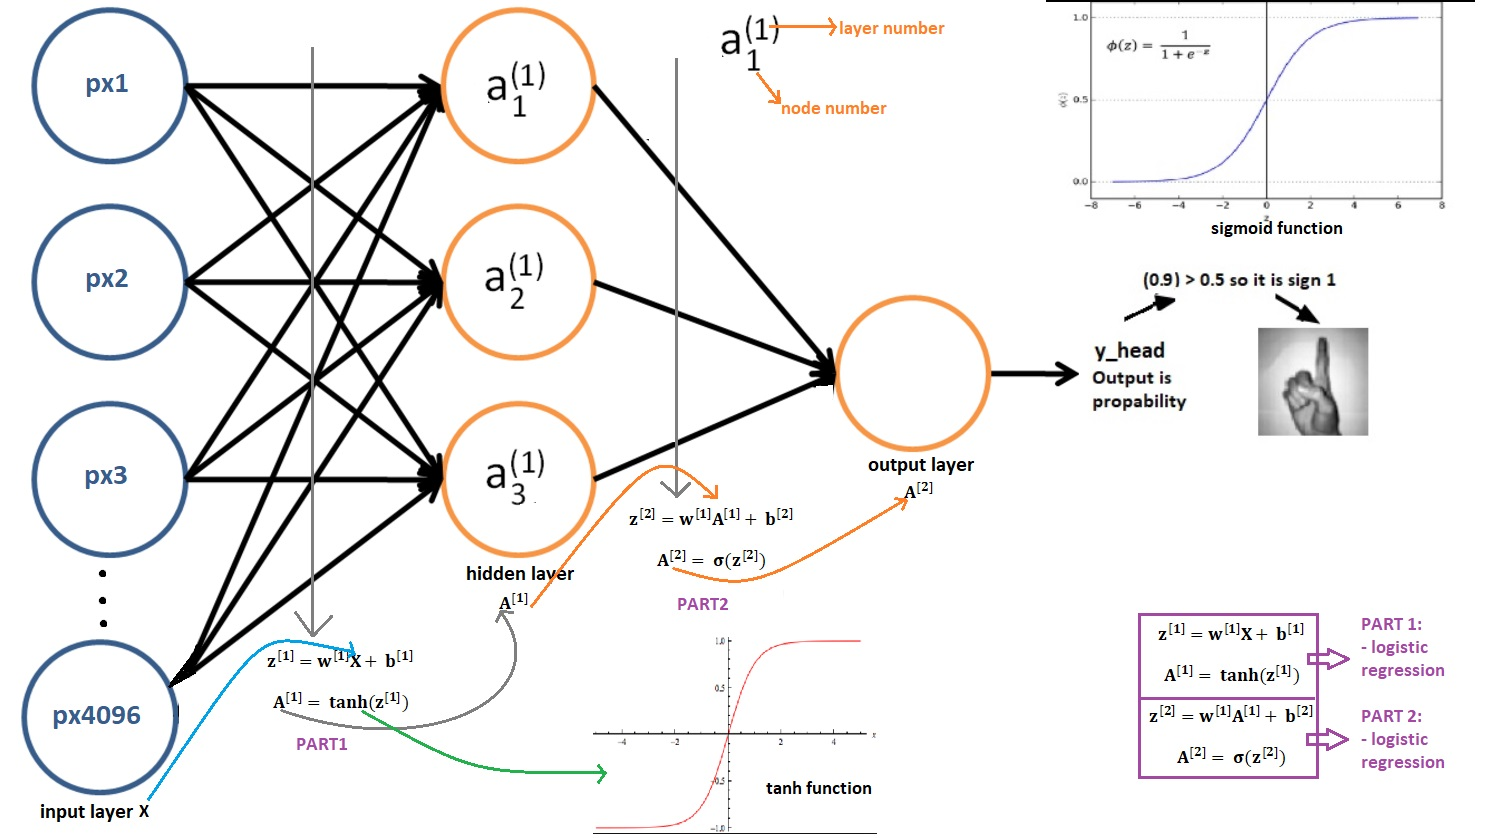

Burada input ve output layer'ın arasında bir hidden layer bulunmaktadır.

Input layer'da 4096 piksel vardır ve bu piksellerin her biri **node** olarak adlandırılır.

Bu durumda input layer 4096 node'dan, output layer ise 1 node'dan oluşmaktadır.

Hidden layer da 3 node'dan oluşmuştur.

Hidden layer'daki node sayısı learning rate gibi bir hyperparameter'dır. Intuitive bir şekilde seçilir. En uygununun bulunması gerekir.

Input ve output layerları değişmez. Logistic regression ile aynıdır.

Pikseller weight ile çarpılıp bias ile toplanıp bir z değeri elde edilir.

**z^1 = x*w^1 + b^1**

**Logistic regression'da z değeri sigmoid function'a sokulurken, neural network'te tanh fonksiyonuna sokulur.**

**A^(1) = tanh(z^1)**

tanh function sigmoid function gibi bir **activation function**'dır.

**tanh function'ın sigmoid function'dan farkı şudur;**

Sigmoid function içerisine aldığı parametreyi 0 ve 1 arasında probabilistic değere eşitler. Output 0-1 arasındadır.

**tanh function aldığı parametreyi 1 ve -1 arasında bir değere eşitler.**

Sigmoid function 0 ve 1 arasında olduğundan mean değeri 0.5'e yakındır. tanh function -1 ve 1 arasında olduğundan mean değeri 0'a yakındır.

Hidden unitler'de tanh function sigmoid function'dan daha iyidir. Çünkü tanh function'ın mean değeri (ortalaması) sıfıra daha yakın olduğundan, datanın bir sonraki layer için merkeze daha yakın tutulduğu anlamına gelir.

Ayrıca tanh function non linear bir şekilde artar. Bu da modelin daha iyi öğrenmesini sağlar.

Non linearity karmaşıklık olarak düşünülebilir. Model ne kadar karmaşık şeyler öğrenirse datayı o kadar iyi öğrenir anlamına gelir.

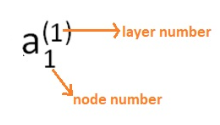

Layer number hangi hidden layer'da olduğunu gösterir.

**İlk başta z değeri hesaplanırken weight ve bias değerleri hidden layer'dan gelir. Hidden layer 1. layer olduğundan w^(1) ve b^(1) yazar.**

**z^(2) = A^(1)*w^(2) + b^(2)**

tanh function sonucu elde edilen A^1 değeri tekrardan weight ile çarpılıp bias ile toplanıp z^(2) değeri elde edilir.

**z^(2) değeri hesaplanırken weight ve bias değerleri 2. layerden yani output layerdan gelir.**

z^(2) değeri sigmoid function'a ya da softmax function'a koyulduğunda A^(2) değeri elde edilir.

Bu durumda A^(1) değeri hidden layer'da A^(2) değeri output layer'dadır.



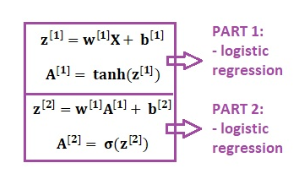

A^(2) değeri elde edilene kadar art arda iki kez logistic regression yapıldığı görülür.

**Neural network'te fark activation function'ın tanh olmasıdır.**

Burada da logistic regression'da olduğu gibi update edilmesi gereken parametreler weight ve bias'tır. Ancak weight ve bias değerleri **2 kez update edilir.**

**Sign Language Digits Dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


X görsellerden oluşan bir array,

Y ise görsellerin classlarından oluşan bir arraydır.

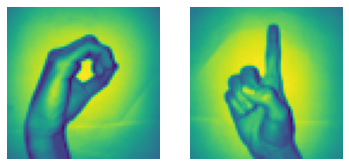

In [ ]:
x_l = np.load('/content/drive/MyDrive/data/X.npy')
Y_l = np.load('/content/drive/MyDrive/data/Y.npy')
img_size = 64 
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')
plt.show()

image size 64 olarak datada verilmişti. Her bir görselde 4096 tane piksel vardır. Bu pikseller imshow parametresi ile görselleştirilir.

subplot methoduyla iki görsel bir arada çizdirilmiştir.

reshape methoduyla datadaki görsel 64x64 boyutuna getirilir.

Datanın 260. ve 900. indekslerindeki görseller çizdirilmiştir.

Plot çizdirilirken normalde x ve y eksenleri de olur. axis('off') ile plot edilirken eksenler gözükmez.

In [ ]:
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


Görseller kullanılacak modellere öğretilmek için numpy array'e çevrilir.

Datada 204-409 indekslerinde 0 görseli, 822-1027 indekslerinde 1 görseli bulunmaktadır.

0 ve 1 görselleri kullanılacağından bu görseller seçilerek filtreleme yapılmıştır.

Y labelı 0 ve 1'lerden oluşan bir arraydir.

Datada her bir görsel için 205 sample bulunduğundan 0 ve 1'lerden oluşan 1x205 boyutunda arrayler oluşturulup, bu arrayler birleştirilip 1x410 boyutunda y labelı oluşturulmuştur.

X featurenın shape'i (410, 64, 64)'tir.

Her bir class için 205 sample bulunduğundan ve 0 ve 1 classları kullanılacağından 410'dur.

Datadaki görseller 64x64 boyutunda bir matrixten oluştuğundan 64,64 yazar.

Y labelında ise her bir değer için bir satır ayrılır. Bu yüzden satır boyutu 410, label tek bir sütundan oluştuğundan sütun sayısı 1'dir.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

Datada eğitilirken %75'i training, %15'i testing için kullanılacaktır.

random_state parametresiyle kod her çalıştırıldığında aynı training datası kullanılır. Yani her seferinde datayı aynı randomlıkta böler. Eğer bu parametre kullanılmazsa kod her çalıştırıldığında datanın farklı bir bölümü training için ayrılacaktır ve accuracy değeri değişecektir.

Train ve test sample sayısına bakmak için bir değişkene eşitlenirler.

x train'in boyutu (348,64,64)'tür. Bunu deep learning modelinde kullanmak için 2 boyutlu hale getirilmelidir.

Görselin iki eksenindeki piksel sayısı da 64'tür. Bu eksen boyutları birleştirildiğinde 64x64 = 4096 boyutunda olur.

In [ ]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


(348,64,64)

348 -> 0. indeks

64 -> 1.indeks

64 -> 2.indeks

Görselin bir ekseninde 64 piksel vardır ve bu 1. indekstedir. Diğer ekseninde de 64 piksel vardır ve bu 2. indekstedir. İki boyutlu hale getirmek için 1. ve 2. indeksler çarpılır.

Burada ayrıca train datasında 348 sample, test datasında 62 sample olduğu görülür.

In [ ]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


Train ve test datalarının transpose'u alınır. Böylelikle her bir feature bir satırda bulunmuş olur.

weight değerleri ile feature değerleri çarpılacağından matrix çarpımında 1. değerin column sayısı ile ikinci değerin row sayısı aynı olmalıdır.

weight shape (0.01,4096) -> her bir feature için bir weight değeri

x_train shape (4096,348)

(0.01,4096) * (4096,348) şu durumda matrix çarpımı için uygundur.

#**2-Layer Neural Network** 


Şu adımlar izlenecektir.

*   **Size of layers and initializing parameters weights and bias**
*   **Forward propagation**
*   **Loss function and Cost function**
*   **Backward propagation**
*   **Update Parameters**
*   **Prediction with learnt parameters weight and bias**
*   **Create Model**

**1) Size of layers and initializing parameters weights and bias**

Güncellenmesi gereken parametreler;

**z^1 = x*w^1 + b^1**

**z^(2) = A^(1)*w^(2) + b^(2)**

**weight^(1), bias^(1), weight^(2), bias^(2)** olmak üzere 4 tanedir.

Logistic regression'da weight değeri 0.01 ve bias değeri 0 verilmişti. Eğer weight değeri 0 verilseydi model öğrenemezdi.

Burada initialize parametreleri 0 verilseydi ilk hidden layer'daki her hesaplama aynı olacaktı, farklılık olmayacaktı. Bu durumda linear regression'la bir fark olmayacaktı. 

weight değeri 0.01 tanımlanmak yerine random bir şekilde belirlenecektir ancak küçük bir sayı olacaktır. 

Random tanımlanmasının sebebi çeşitlilik olması ve modelin farklı değerleri öğrenebilmesidir.

Eğer weight değeri büyük verilirse, tanh function'ın sonucu 1'e çok yakın bir değer verir, bu değerin türevi alınırken 0'a çok yakın bir değer çıkar ve güncelleme zamanı çok uzar.

In [ ]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3,x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3 ,1)),
                  "weight2": np.random.randn(y_train.shape[0],3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0],1))}
    return parameters

In [ ]:
x_train.shape[0]

4096

In [ ]:
y_train.shape[0]

1

weight değerleri 0.1 ile çarpılarak küçültülür.

random.randn parametresiyle random değerler atanır.

x_train.shape[0] ile train datasetinde 4096 piksel bulunduğundan ve weight değeri feature değeri ile çarpılacağından 4096 weight değeri atanır.

3 yazmasının sebebi 3 node olduğundan bu değerler 3 node için ayrı ayrı atanır.

weight değeri (3,4096) boyutunda olur. 

Bu weight değeri pikseller ile çarpılacaktır. Pikseller 4096 boyutunda bir matrix olduğundan -> (3,4096)*(4096) = (3,1) boyutunda bir matrix oluşur.

Bu durumda w*x boyutu (3,1) olmuş olur.

Bu sonucun bias ile toplanabilmesi için bias'ın da aynı boyutta bir matrix olması gerekir.(3,1)

Bu durumda A^(1)'in boyutu da (3,1) olur.

A^(1) ile weight^(2) çarpılacağından weight^(2)'nin boyutu matrix çarpımı yapılabilmesi için (1,3) atanır. 

weight^(2)*A^(1)  ->

(3,1)*(1,3) = (1,1) boyutunda olur.

Bu durumda bias^(2) de (1,1) boyutunda olmalıdır.

**2) Forward Propagation**

Piksellerden cost function'a kadar olan tüm adımlara Forward Propagation denir.

Logistic Regression'dan farkı tanh function kullanıldığından iki kez işlem yapılır.

In [ ]:
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [ ]:
def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"],x_train) +parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"],A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

Z1'de pikseller weight1 ile çarpılıp, bias1 ile toplanır.

Z1 değeri tanh function'a koyulduğunda A1 değeri elde edilir.

A1 değeri weight2 ile çarpılıp, bias2 ile toplandığında Z2 değeri elde edilir.

Bu bir binary classification olduğundan sigmoid function'a koyulur ve A2 değeri elde edilir.

A2 output layer'daki değerdir ve sigmoid function sonucu olduğu için 0-1 arasında probabilistic bir değerdir.

Z1, A1, Z2, A2 değerleri parametreler update edilirken kullanılacağından bir dictionary içerisinde return edilir.

**3) Loss and Cost Functions**

**Loss function:** Modele 0 ve 1'leri tanımasını isterken bazı yanlış tahminler döndürdüğünde elde edilen hata oranıdır.

Yapılan prediction (y_head değeri) doğruysa loss function değeri 0 olur.

Yapılan prediction yanlışsa loss değeri çok fazla olur.

**Cost Function:** Her görselin bir loss function değeri vardır. Tüm loss function değerlerinin toplamı cost function'ı verir.

Cost function değeri yüksekse oluşturulan model iyi bir model değildir, weight değerlerinin güncellenmesi lazımdır.

Her bir görsel ayrı ayrı numpy array'lerde tutulursa her birine ayrı ayrı forward propagation uygulanır.

Tüm görseller bir numpy array'e koyulduğunda tüm matrise bir kez forward propagation uygulanır. Bir forward propagation işleminde datadaki görsel kadar loss function değeri elde edilir. Bu loss değerleri toplanarak bir cost değeri elde edilir.

Cost function değeri yüksekse weight ve bias değerleri güncellenerek cost function değerini azaltmak amaçlanır.

**Cross Entropy Function**

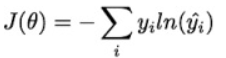

In [ ]:
def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2),Y) #logprobs->loss function
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

Output layer'ın sonucu A2 olduğundan, A2 fonksiyona input olarak alınır.

A2 değeri ile gerçek y değeri logaritmik olarak çarpılır.

loss function değerleri toplanıp y.shape'e bölünür.

y.shape'e bölünmesinin sebebi scale edilmesidir.

**4) Backward Propagation**

Weight ve bias değerleri rastgele verildiği için cost değeri çok büyükse bu weight ve bias'a bağlıdır.

Cost değerini düşürmek için weight ve bias güncellenmelidir.

weight ve bias değerleri türevleri alınarak güncellenir.

Cost function'dan başlayarak geriye doğru gitme işlemine **backward propagation** denir.

In [ ]:
def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"]-Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis =1,keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T,dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis =1,keepdims=True)/X.shape[1]
    grads = {"derivative_weight1": dW1,
             "derivative_bias1": db1,
             "derivative_weight2": dW2,
             "derivative_bias2": db2}
    return grads

parameters -> weight^(1), bias^(1), weight^(2), bias^(2)

cache -> Z1, A1, Z2, A2

X -> görsellerin bulunduğu data

Y -> labelların bulunduğu data

keepdims -> sonucu array olarak tutar.

Cost function'dan weight^(1)'e gidebilmek için;
*   cost function'ın z^(2)'ye göre türevi
*   z^(2)'nin weight^(1)'e göre türevinin alınması gerekir.



Backward propagation sonucunda weight ve bias değerlerinin türevleri (eğimleri) bilinir. Böylelikle parametrelerin değişimleri bilinmiş olur.

**5) Update Parameters**

In [ ]:
def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"]-learning_rate*grads["derivative_weight1"],
                  "bias1": parameters["bias1"]-learning_rate*grads["derivative_bias1"],
                  "weight2": parameters["weight2"]-learning_rate*grads["derivative_weight2"],
                  "bias2": parameters["bias2"]-learning_rate*grads["derivative_bias2"]}
    
    return parameters

parametreler - learning rate * parametrelerin değişimi 

learning rate -> bir hyperparameter'dır. weight ve bias değerlerinin ne kadar hızlı güncelleneceğidir. Çok hızlı olunursa asla güncellenemeyebilir, çok yavaş olursa da güncellemek çok zaman alır.

Model parametrelerden oluşur.

Parametreler weight ve bias'tır.

weight ve bias değerleri update edilip öğrenildiğine göre model hazırdır.

**6) Prediction with learnt parameters weight and bias**

In [ ]:
def predict_NN(parameters,x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

predict fonksiyonu x_test datasında bulunan test edilecek resimleri ve parametreleri input olarak alır.

İlk başta x_test datası kullanılarak forward propagation ile A^2 yani y_head değeri elde edilir.

Boş bir y_prediction labelı oluşturur.

A^2 değeri threshold'a koyulur.

Eğer 0.5'ten büyükse görsel 1, 0.5'ten küçükse görsel 0'dır.

Bu bilgiler y_prediction array'inin içerisine depolanır.



**7) Create Model**

Bu kısımda oluşturulan tüm bloklar birleştirilip 2-Layer Neural Network oluşturulur. 

Cost after iteration 0: 0.310243
Cost after iteration 100: 0.326553
Cost after iteration 200: 0.317024
Cost after iteration 300: 0.296490
Cost after iteration 400: 0.268622
Cost after iteration 500: 0.242080
Cost after iteration 600: 0.208588
Cost after iteration 700: 0.179250
Cost after iteration 800: 0.154942
Cost after iteration 900: 0.135380
Cost after iteration 1000: 0.119501
Cost after iteration 1100: 0.106065
Cost after iteration 1200: 0.094108
Cost after iteration 1300: 0.083632
Cost after iteration 1400: 0.074820
Cost after iteration 1500: 0.067182
Cost after iteration 1600: 0.060538
Cost after iteration 1700: 0.054882
Cost after iteration 1800: 0.050126
Cost after iteration 1900: 0.046128
Cost after iteration 2000: 0.042712
Cost after iteration 2100: 0.039726
Cost after iteration 2200: 0.037130
Cost after iteration 2300: 0.034906
Cost after iteration 2400: 0.032999


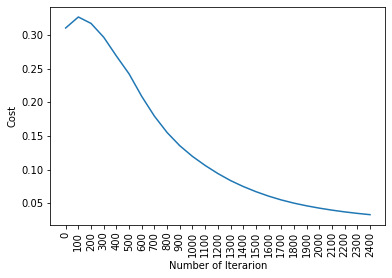

train accuracy: 99.42528735632185 %
test accuracy: 95.16129032258064 %


In [ ]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list  = []
    index_list = []

    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train) #hidden layerda kaç node olacağı belirlenir(3).
                                                                            #weightler ve biasların boyutları belirlenir.
    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train,parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=2500)

x_train ve y_train weight ve bias değerlerinin öğrenilebilmesi (update edilmesi) için gerekli datalar

x_test ve y_test ile öğrenilen parameterler(weightler ve biaslar) ile prediction yapılır.

num_of_iteration -> öğrenmenin ne kadar adımda gerçekleştiği

cost değerinin 0.3 ile başlayıp 0.03'e kadar düştüğü görülür.

num_of_iteration -> 2500 verilmiştir. Bu durumda 2500 defa forward propagation ve backward propagation yapılarak weightler ve biaslar 2500 defa update edilir.

Burada 2 layer'dan oluşan neural network'ün nasıl oluşturulacağı gösterilmiştir.

Birinci layer hidden layer, ikinci layer output layer'dır.

hidden layer'daki node sayısı belirlenerek weight ve bias parametrelerinin initialize değerleri tüm nodelara atanır.

Forward propagation sonucu y_head değeri oluşur.

y_head değerinin doğru mu yanlış mı hesaplandığı lost ve cost functionlara bakılarak karar verilir. Eğer yanlış hesaplanmışsa cost function değeri çok büyük çıkar. Bu durumda weightler ve biasların güncellenmesi gerekir.

Model parametrelerden oluştuğu için parametreler güncellendikten model hazır demektir.

x_test datasındaki görseller kullanılarak forward propagation yapılır. y_head değeri threshold'a koyularak y_test labelı oluşturulur.

Model oluşturulurken kaç kez forward backward propagation yapılacağı belirlenip minimum cost değerine ulaşmak amaçlanır.

**L Layer Neural Network**

Keras kütüphanesi kullanılacaktır.

Hidden layer sayısı artırılırsa ne olur?

Eğer hidden layer sayısı azsa, bu hidden layerlar görselerin belli başlı basit bileşenlerini keşfederler.


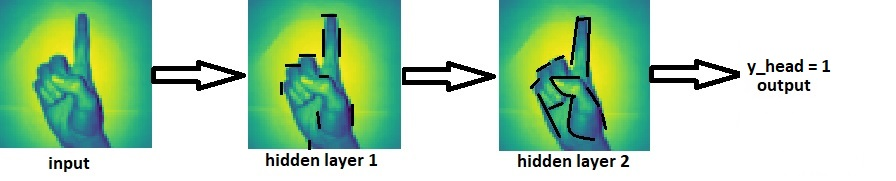

Hidden layer 1 basit kenarlar gibi basit şekilleri öğrenmiştir.

Hidden layer 2'de kıvrım gibi daha kompleks şekillerin de öğrenildiği görülür. Data daha iyi train edilmiştir.

Böylelikle hidden layer sayısı artırılarak non linearity de artırılmış olur.

learning rate, number of iterations, number of hidden layer, number of hidden units, activation function'ın türü seçilmesi gereken hyperparameterlardır. 

Burada 2 hidden layer, bu hidden layerlar için 8 ve 4 tane node kullanılacaktır.

Node ve hidden layer sayısı arttıkça modelin karmaşıklığı artar. Hızlı sonuç alabilmek için hidden layer ve node sayısı düşük tutulmuştur.

Hidden layerlarda activation function olarak relu kullanılacaktır. Relu diğer activation functionlara göre daha hızlıdır. Çünkü türevini alması kolaydır.

Binary classification yapıldığından output layerda sigmoid function kullanılacaktır.

number_of_iteration 100 olacaktır. Bu durumda 100 defa forward backward propagation yapılıp 100 defa cost function hesaplanır.

Amaç keras kütüphanesi kullanarak hyperparameteler ayarlamak ve l-layer neural network oluşturmaktır.

In [ ]:
#transpose
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

In [ ]:
x_train.shape[1]

4096

Keras'ta kullanabilmek için transpose'ları alınmalıdır.

Keras çalışırken featureları kendisi satıra getirmektedir. 

2 layer neural network oluştururken her şey adım adım yapıldığı için transpose'u alınmıştır.

Eğer transpose alınmış şekilde bırakılırsa hata vermektedir.

Bu yüzden tekrardan transpose alınarak normal haline getirilir.

In [ ]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier #kerasta bir data classify edilirken bu method kullanılır.
from sklearn.model_selection import cross_val_score
from keras.models import Sequential #neural network initialize edilmek için kullanılır.
from keras.layers import Dense #layerları oluşturmak için kullanılır.

def build_classifier():
    classifier = Sequential() #Sequential methodu çağrılarak neural network yapısı initialize edilir.
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    #add methoduyla neural network'e layer eklenir.
    #input_dim ile feature size'ı belirtilir.
    #kerasta input ve output dimension belirtilmelidir.
    #kernel_initializer parametresiyle weight değerleri initialize edilir.
    #uniform olduğu weight değerleri random bir atanır, scale edilmez.
    #1. hidden layer için 8 node belirlenmiştir.
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    #4 node'dan oluşan 2. hidden layer eklenir, activation function relu'dur.
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    #output layer 1 node'dan oluştuğu için units = 1 atanır, activation function sigmoid'dir.
    #sigmoid function'da 0-1 arasında probabilistic bir değer verir.
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    #classifier'ın yani neural network'ün compile edilmesi için optimize edilir.
    #binary_crossentropy logistic regression'daki loss function hesabıdır.
    #adam (adaptive momentum) optimizasyon algoritmasıdır.learning rate değerini değiştirir.
    #Böylelikle öğrenme daha hızlı gerçekleşir.
    #model değerlendirilirken accuracy metriği kullanılacaktır.

    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
#KerasClassifier ile oluşturulan classifier çağrılır.
#epochs number of iteration sayısıdır. 
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
#cross validation ile train datası 3'e bölünür ve 3 accuracy değeri elde edilir.
#her adımda train datasının farklı bölümü validation olarak ayrılır.
#elde edilen accuracy değerlerinin ortalaması alınarak tek bir accuracy değeri elde edilir.
#böylelikle cross validation kullanılarak modelin doğrulaması yapılır. 
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Epoch 1/100
8/8 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.5172
Epoch 2/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.5431
Epoch 3/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5431
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6903 - accuracy: 0.5431
Epoch 5/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6892 - accuracy: 0.5431
Epoch 6/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.5431
Epoch 7/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6865 - accuracy: 0.5431
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5431
Epoch 9/100
8/8 [==============================] - 0s 3ms/step - loss: 0.6833 - accuracy: 0.5431
Epoch 10/100
8/8 [==============================] - 0s 4ms/step - loss: 0.6803 - accuracy: 0.5431
Epoch 11/100
8/8 [===========

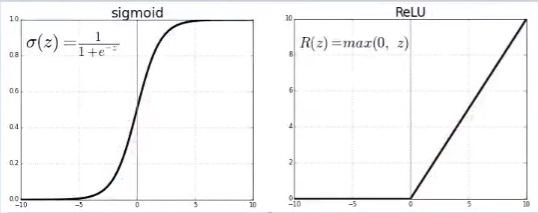

Sigmoid function input'u 0-1 arasında sınırlandırır.

ReLU'da input 0'dan küçük olduğunda 0 olarak değerlendirilir.

Mesela ReLU'ya -5, -6 girdiğinde 0 olarak çıkmıştır.

Eğer input 0'dan büyükse, input neyse output da odur.

Mesela ReLU'ya 5 girmişse 5 olarak çıkar.

Cross validation 3 olduğu için data 3'e bölünüp 3 adımda datanın farklı bölümlerinin accuracy değerlerine bakılmıştır.

Daha sonra bu accuracy değerlerinin ortalaması alınmıştır.

Cross validation yöntemiyle overfitting durumunu önlemek amaçlanır.

Varyans değerinin çok küçük çıktığı görülür. Bu durumda overfitting olmamış denilir.